Text(0.5, 1.0, 'Barcelona vs Real Madrid Shots Map')

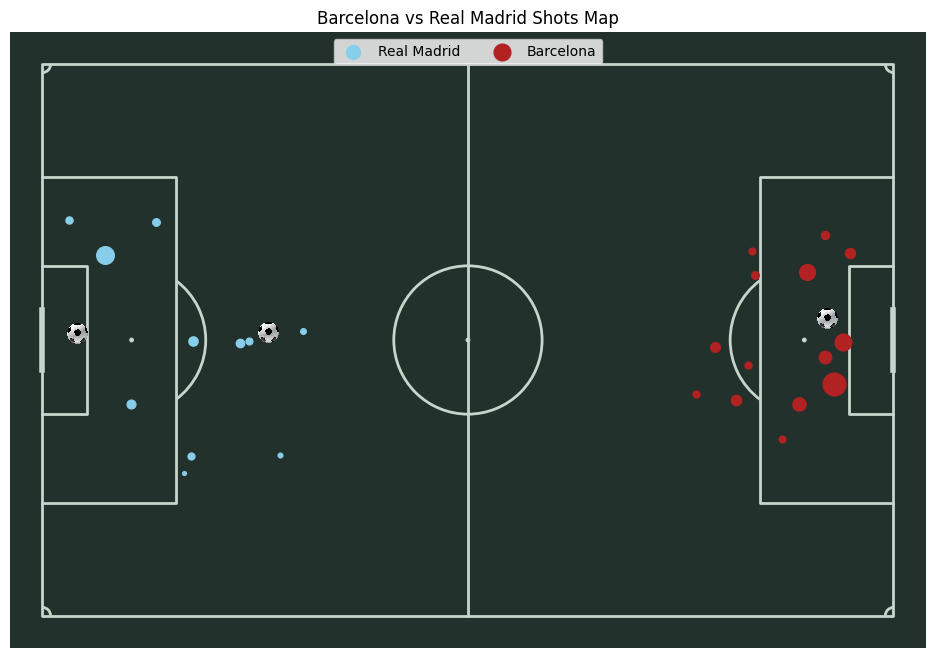

In [7]:
# Shot Maps
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from main_data import main_content
from mplsoccer.pitch import Pitch


shots_data = main_content['shotmap']['shots']


first_team_shots = []
second_team_shots = []
path = './ball.png'
image = plt.imread(path)

for el in shots_data:
    if el['teamId'] != 8633:
        first_team_shots.append(
            {'x': el['x'], 'y': el['y'],
             'eventType': el['eventType'],
             'color': 'green' if el['eventType'] == 'Goal' else 'firebrick',
             'size': 100 if el['eventType'] == 'Goal' else 1000 * el['expectedGoals'],
             'xG': el['expectedGoals']})
    else:
        second_team_shots.append(
            {'x': el['x'], 'y': el['y'],
             'eventType': el['eventType'],
             'color': 'skyblue',
             'size': 100 if el['eventType'] == 'Goal' else 1000 * el['expectedGoals'],
             'xG': el['expectedGoals']})

pitch = Pitch(pitch_type='uefa',
              pitch_color='#22312b', line_color='#c7d5cc', corner_arcs=True)
fig, ax = pitch.draw(
    figsize=(12, 8), constrained_layout=True, tight_layout=False)

for el in second_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.03), (2 * 52.5 - el['x'], 2 * 34 - el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(2 * 52.5 - el['x'], 2 * 34 - el['y'],
                color=el['color'], linewidths=1, s=el['size'], label='Real Madrid')

for el in first_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.03), (el['x'], el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'], s=el['size'],
                linewidths=1, label='Barcelona')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', ncol=2)

plt.title('Barcelona vs Real Madrid Shots Map')